# Mortgage Loan Approval Capstone Project 
## Data Wrangling

<img src="https://images.unsplash.com/photo-1560518883-ce09059eeffa?q=80&w=1973&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" width="700">

### Importing the Libraries and Dataset

In [4]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import matplotlib.colors as mcolors

In [5]:
# Set the path 
path = 'clean_HMDA.csv'

# Read the dataframe
dataframe = pd.read_csv(path)

# Set opition to display all the columns
pd.set_option('display.max_columns', None)

# Display the first five rows of the dataframe
dataframe.head()

/var/folders/md/rprl_jf94cx0vvvnxffb9cn00000gn/T/ipykernel_2610/1168179207.py:5: DtypeWarning: Columns (21,22,23,25,26,27,32,37,39,55) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv(path)


,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,origination_charges,loan_term,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,income,debt_to_income_ratio,applicant_credit_score_type,co-applicant_credit_score_type,applicant_ethnicity-1,co-applicant_ethnicity-1,applicant_ethnicity_observed,co-applicant_ethnicity_observed,applicant_race-1,co-applicant_race-1,applicant_race_observed,co-applicant_race_observed,applicant_sex,co-applicant_sex,applicant_sex_observed,co-applicant_sex_observed,applicant_age,co-applicant_age,applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2022,549300QG83M0EX7VC434,99999,WY,56003.0,5.600396e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,1,2,1,1,1,2,2,1,165000.0,75.0,5.75,NaN,3,NaN,NaN,300,2,2,2,2,225000,1,3,3,5,4,371.0,50%-60%,3,2,2.0,2.0,2,2,5.0,5.0,2,2,1,2,2,2,55-64,55-64,Yes,1,1,6,10,3372,15.95,87600,81,1026,1686,50
1,2022,549300QG83M0EX7VC434,99999,WY,56029.0,5.602997e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,2,1,1,1,2,2,2,325000.0,79.75,5.75,2.49,2,NaN,2422.5,12,2,1,1,2,405000,1,1,3,5,1,62.0,46,1,10,2.0,5.0,2,4,5.0,8.0,2,4,1,5,2,4,55-64,9999,No,1,1,6,10,4183,11.36,87600,95,1233,1830,45
2,2022,549300QG83M0EX7VC434,99999,WY,56003.0,5.600396e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,2,1,1,1,2,2,2,75000.0,62.93,4.75,0.91,2,1585.6,710.0,240,2,2,2,2,115000,1,1,3,5,1,43.0,30%-<36%,3,10,2.0,5.0,2,4,5.0,8.0,2,4,1,5,2,4,45-54,9999,No,1,1,6,10,5662,14.06,87600,89,1389,2238,49
3,2022,549300QG83M0EX7VC434,99999,WY,56029.0,5.602997e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,1,2,1,1,1,2,2,2,725000.0,79.98,5.5,1.0,3,9133.2,7272.0,360,2,2,2,2,905000,1,2,3,5,1,662.0,<20%,1,1,2.0,2.0,2,2,5.0,5.0,2,2,2,1,2,2,55-64,55-64,No,1,1,6,10,4053,7.60,87600,94,1460,2306,38
4,2022,549300QG83M0EX7VC434,99999,WY,56003.0,5.600396e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,2,1,1,1,2,2,1,145000.0,76.92,6.11,NaN,3,NaN,NaN,300,2,2,2,2,185000,1,3,3,5,1,176.0,<20%,1,10,2.0,5.0,2,4,5.0,8.0,2,4,1,5,2,4,45-54,9999,No,1,1,6,10,2487,12.18,87600,75,875,1400,55


In [6]:
dataframe.tail()

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,origination_charges,loan_term,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,income,debt_to_income_ratio,applicant_credit_score_type,co-applicant_credit_score_type,applicant_ethnicity-1,co-applicant_ethnicity-1,applicant_ethnicity_observed,co-applicant_ethnicity_observed,applicant_race-1,co-applicant_race-1,applicant_race_observed,co-applicant_race_observed,applicant_sex,co-applicant_sex,applicant_sex_observed,co-applicant_sex_observed,applicant_age,co-applicant_age,applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
5075868,2022,549300QG83M0EX7VC434,99999,WY,56003.0,5.600396e+10,NaN,Conventional:First Lien,Multifamily:Site-Built,Not Hispanic or Latino,White,Joint,1,2,1,1,1,2,2,1,245000.0,75.0,5.75,NaN,3,NaN,NaN,300,2,2,2,2,335000,1,3,3,5,5-24,NaN,NaN,3,2,2.0,2.0,2,2,5.0,5.0,2,2,1,2,2,2,55-64,55-64,Yes,1,1,6,10,2487,12.18,87600,75,875,1400,55
5075869,2022,549300QG83M0EX7VC434,99999,WY,56003.0,5.600396e+10,NaN,Conventional:First Lien,Multifamily:Site-Built,Not Hispanic or Latino,White,Joint,1,2,1,1,1,2,2,1,365000.0,75.0,5.75,NaN,3,NaN,NaN,300,2,2,2,2,485000,1,3,3,5,5-24,371.0,50%-60%,3,2,2.0,2.0,2,2,5.0,5.0,2,2,1,2,2,2,55-64,55-64,Yes,1,1,6,10,3372,15.95,87600,81,1026,1686,50
5075870,2022,549300QG83M0EX7VC434,99999,WY,56015.0,5.601596e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,3,2,1,1,1,2,2,2,45000.0,NaN,NaN,NaN,3,NaN,NaN,360,2,2,2,2,NaN,1,1,3,5,1,8.0,NaN,9,9,2.0,2.0,2,2,5.0,5.0,2,2,2,2,2,2,<25,<25,No,1,1,6,9,4580,15.85,87600,79,1258,1700,47
5075871,2022,549300QG83M0EX7VC434,99999,WY,56005.0,5.600500e+10,C,Conventional:First Lien,Single Family (1-4 Units):Manufactured,Not Hispanic or Latino,White,Female,3,2,1,1,1,2,2,2,105000.0,66.67,NaN,NaN,3,NaN,NaN,300,2,2,2,2,155000,2,1,1,1,1,31.0,>60%,1,10,2.0,5.0,2,4,5.0,8.0,2,4,2,5,2,4,45-54,9999,No,1,1,6,1,6613,15.45,87600,96,1715,2318,23
5075872,2022,549300QG83M0EX7VC434,99999,WY,56029.0,5.602997e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,1,2,1,1,1,2,2,2,305000.0,75.0,3.875,0.055,2,5351.1,3470.0,360,2,2,2,2,405000,1,1,3,5,1,66.0,42,2,3,2.0,2.0,2,2,5.0,5.0,2,2,1,2,2,2,25-34,25-34,No,1,1,1,10,2586,8.89,87600,85,784,1247,43


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5075873 entries, 0 to 5075872
Data columns (total 68 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   activity_year                             int64  
 1   lei                                       object 
 2   derived_msa-md                            int64  
 3   state_code                                object 
 4   county_code                               float64
 5   census_tract                              float64
 6   conforming_loan_limit                     object 
 7   derived_loan_product_type                 object 
 8   derived_dwelling_category                 object 
 9   derived_ethnicity                         object 
 10  derived_race                              object 
 11  derived_sex                               object 
 12  action_taken                              int64  
 13  preapproval                               int64  
 14  lo

In [8]:
dataframe.shape

(5075873, 68)

In [9]:
# Define a custom color palette
colors = ["#172A3A", "#004346", "#09BC8A", "#74B3CE", "#508991"]

# Create a custom color palette
custom_palette = sns.color_palette(colors)

# Set the custom color palette
sns.set_palette(custom_palette)

# Create a custom sequential colormap
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

# DATA WRANGLING

In [11]:
# Create copy of the dataframe for cleaning
df = dataframe.copy()

In [12]:
# # Create a sample for computational purposes
# df = df.sample(frac=0.05)  # Replace 0.1 with the fraction of rows you want


In [13]:
df.head()

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,origination_charges,loan_term,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,income,debt_to_income_ratio,applicant_credit_score_type,co-applicant_credit_score_type,applicant_ethnicity-1,co-applicant_ethnicity-1,applicant_ethnicity_observed,co-applicant_ethnicity_observed,applicant_race-1,co-applicant_race-1,applicant_race_observed,co-applicant_race_observed,applicant_sex,co-applicant_sex,applicant_sex_observed,co-applicant_sex_observed,applicant_age,co-applicant_age,applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2022,549300QG83M0EX7VC434,99999,WY,56003.0,5.600396e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,1,2,1,1,1,2,2,1,165000.0,75.0,5.75,NaN,3,NaN,NaN,300,2,2,2,2,225000,1,3,3,5,4,371.0,50%-60%,3,2,2.0,2.0,2,2,5.0,5.0,2,2,1,2,2,2,55-64,55-64,Yes,1,1,6,10,3372,15.95,87600,81,1026,1686,50
1,2022,549300QG83M0EX7VC434,99999,WY,56029.0,5.602997e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,2,1,1,1,2,2,2,325000.0,79.75,5.75,2.49,2,NaN,2422.5,12,2,1,1,2,405000,1,1,3,5,1,62.0,46,1,10,2.0,5.0,2,4,5.0,8.0,2,4,1,5,2,4,55-64,9999,No,1,1,6,10,4183,11.36,87600,95,1233,1830,45
2,2022,549300QG83M0EX7VC434,99999,WY,56003.0,5.600396e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,2,1,1,1,2,2,2,75000.0,62.93,4.75,0.91,2,1585.6,710.0,240,2,2,2,2,115000,1,1,3,5,1,43.0,30%-<36%,3,10,2.0,5.0,2,4,5.0,8.0,2,4,1,5,2,4,45-54,9999,No,1,1,6,10,5662,14.06,87600,89,1389,2238,49
3,2022,549300QG83M0EX7VC434,99999,WY,56029.0,5.602997e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,1,2,1,1,1,2,2,2,725000.0,79.98,5.5,1.0,3,9133.2,7272.0,360,2,2,2,2,905000,1,2,3,5,1,662.0,<20%,1,1,2.0,2.0,2,2,5.0,5.0,2,2,2,1,2,2,55-64,55-64,No,1,1,6,10,4053,7.60,87600,94,1460,2306,38
4,2022,549300QG83M0EX7VC434,99999,WY,56003.0,5.600396e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,2,1,1,1,2,2,1,145000.0,76.92,6.11,NaN,3,NaN,NaN,300,2,2,2,2,185000,1,3,3,5,1,176.0,<20%,1,10,2.0,5.0,2,4,5.0,8.0,2,4,1,5,2,4,45-54,9999,No,1,1,6,10,2487,12.18,87600,75,875,1400,55


In [14]:
# Change the column name of our target variable
df.rename(columns={'action_taken': 'outcome'}, inplace=True)

# Change the values to 0 and 1 for better interpretability
df['outcome'] = df['outcome'].replace({1: 1, 3: 0})


In [15]:
# Check the balance of our target class
df['outcome'].value_counts(normalize=True)*100

outcome
1    85.940527
0    14.059473
Name: proportion, dtype: float64

In [16]:
# Look at the remaining null values in more detail
null_percentage = df.isnull().sum() / len(df) * 100

# Display only the columns with null values
null_percentage[null_percentage > 0].sort_values(ascending=False)

total_loan_costs            23.156706
origination_charges         22.092889
rate_spread                 21.155691
interest_rate               14.053681
loan_to_value_ratio          7.338107
income                       4.223687
debt_to_income_ratio         4.223490
applicant_age_above_62       2.808719
property_value               1.689601
census_tract                 1.508706
county_code                  0.945355
conforming_loan_limit        0.595405
loan_term                    0.378260
state_code                   0.361632
applicant_ethnicity-1        0.030221
applicant_race-1             0.012274
co-applicant_ethnicity-1     0.009220
co-applicant_race-1          0.004137
dtype: float64

Observations:
* The remaining columns with a high proportion of null values will likely be very important to the target variable. 
* This will require extra investigation to see replacing values is more appropriate than dropping values.

In [18]:
# Investiage the 7 columns with the most nulls - total_loan_costs
df['total_loan_costs'].value_counts()

total_loan_costs
Exempt      118796
0.0          34447
0.0          30519
500.0         4235
200.0         1751
             ...  
8416.44          1
14699.08         1
6236.41          1
12794.21         1
5993.56          1
Name: count, Length: 1824192, dtype: int64

In [19]:
# Check if exemption equates to a failed mortage application
df[df['total_loan_costs'].isin(['Exempt'])]['outcome'].eq(0).all()

False

In [20]:
# Investiage the 7 columns with the most nulls - origination charges
df['origination_charges'].value_counts()

origination_charges
0.0        248177
0.0        173767
Exempt     118634
995.0       34598
1440.0      31481
            ...  
1819.55         1
23065.5         1
8279.68         1
6539.49         1
2196.86         1
Name: count, Length: 1020999, dtype: int64

In [21]:
# Check if exemption equates to a failed mortage application
df[df['origination_charges'].isin(['Exempt'])]['outcome'].eq(0).all()

False

In [22]:
# Investiage the 7 columns with the most nulls - rate_spread
df['rate_spread'].value_counts()

rate_spread
 Exempt     116795
 0.0          2974
 0.0          2102
 0.19         1576
 0.38         1506
             ...  
-0.48263         1
 0.21738         1
 0.04199         1
-0.51771         1
 -5.056          1
Name: count, Length: 102598, dtype: int64

In [23]:
# Check if exemption equates to a failed mortage application
df[df['rate_spread'].isin(['Exempt'])]['outcome'].eq(0).all()

False

In [24]:
# Investiage the 7 columns with the most nulls - interest_rate
df['interest_rate'].value_counts()

interest_rate
Exempt    117660
5.25       82938
5.625      82802
4.75       82524
5.25       82515
           ...  
10.042         1
8.459          1
8.959          1
8.417          1
7.313          1
Name: count, Length: 11698, dtype: int64

In [25]:
# Check if exemption equates to a failed mortage application
df[df['interest_rate'].isin(['Exempt'])]['outcome'].eq(0).all()

False

In [26]:
# Investiage the 7 columns with the mst nulls - loan_to_value_ratio
df['loan_to_value_ratio'].value_counts()

loan_to_value_ratio
80.0       375285
80.0       371577
95.0       286382
95.0       245959
96.5       234028
            ...  
63.982          1
62.123          1
42.851          1
44.919          1
108.854         1
Name: count, Length: 175568, dtype: int64

In [27]:
# Check if exemption equates to a failed mortage application
df[df['loan_to_value_ratio'].isin(['Exempt'])]['outcome'].eq(0).all()

False

In [28]:
# Investiage the 7 columns with the most nulls - income
df['income'].value_counts()

income
60.0       50868
75.0       46406
70.0       45654
80.0       44681
65.0       44538
           ...  
3894.0         1
5870.0         1
57520.0        1
18759.0        1
11193.0        1
Name: count, Length: 6484, dtype: int64

In [29]:
# Check if exemption equates to a failed mortage application
df[df['income'].isin(['Exempt'])]['outcome'].eq(0).all()

True

In [30]:
# Investiage the 7 columns with the most nulls - debt_to_income
df['debt_to_income_ratio'].value_counts()

debt_to_income_ratio
30%-<36%    740952
20%-<30%    717991
50%-60%     427528
<20%        257322
49          204205
44          202926
42          198014
>60%        193373
43          182582
41          182338
40          178102
39          171186
45          162726
38          161353
48          161186
37          154704
47          151778
46          150193
36          145823
Exempt      117212
Name: count, dtype: int64

In [31]:
# Check if exemption equates to a failed mortage
df[df['debt_to_income_ratio'].isin(['Exempt'])]['outcome'].eq(0).all()

False

In [33]:
# Assuming df is your DataFrame
count_exempt = (df == 'Exempt').sum().sum()
print("Count of 'Exempt' in the DataFrame:", count_exempt)

Count of 'Exempt' in the DataFrame: 942042


In [39]:
import pandas as pd

# Assuming df is your DataFrame
count_exempt = (df == 8888).sum().sum()

# Create a DataFrame to display the count
count_df = pd.DataFrame({'Count of "Exempt"': [count_exempt]})

# Display the table
count_df


,"Count of ""Exempt"""
0,8547


In [32]:
# Chek how often 'exempt occurs in the data as a percentage
Exempt_occurences = (df.isin(['Exempt']).sum())/len(df)*100
Exempt_occurences.sort_values(ascending=False)

total_loan_costs                           2.340405
origination_charges                        2.337214
property_value                             2.322241
interest_rate                              2.318025
loan_term                                  2.316055
                                             ...   
other_nonamortizing_features               0.000000
construction_method                        0.000000
lei                                        0.000000
manufactured_home_secured_property_type    0.000000
tract_median_age_of_housing_units          0.000000
Length: 68, dtype: float64

Observations:
* The are several cases where the data is recoreded as 'exempt'.
* This is missing data that will not add any meaningful information to the dataset. 
* In the affected columns, 'exempt' is present in less than 3% of the rows.
* This 'exempt' data will not allow us to draw any insights or see the extent to which it has an effect of the target variable. 
* To be 'exempt' for giving crucial data sucha as income suggest the data relates to some deliberate hiding of inofrmation. To determine why is beyond the scope of this anlaysis. Therefore i will drop the rows containing 'exempt'.
* According to the data dictionary, 'exempt' is also presnt in the numerical columns as '1111' so i will check for this.

In [34]:
# Chek how often 'exempt' occurs in the data as a percentage
Exempt_occurences = (df.isin([1111]).sum())/len(df)*100
Exempt_occurences.sort_values(ascending=False)

aus-1                                2.350985
interest_only_payment                2.330456
balloon_payment                      2.330456
other_nonamortizing_features         2.330456
negative_amortization                2.330456
                                       ...   
loan_term                            0.000000
property_value                       0.000000
construction_method                  0.000000
lei                                  0.000000
tract_median_age_of_housing_units    0.000000
Length: 68, dtype: float64

In [35]:
# Create a boolean mask where 'Exempt' appears
mask = df.isin(['Exempt'])

# Identify rows where 'Exempt' appears
rows_with_exempt = mask.any(axis=1)

# Drop the rows with 'Exempt
df = df[~rows_with_exempt]

In [36]:
# Columns with 1111
columns_to_check = ['denial_reason-1', 
                    'business_or_commercial_purpose', 
                    'negative_amortization', 
                    'balloon_payment', 
                    'interest_only_payment', 
                    'reverse_mortgage', 
                    'submission_of_application', 
                    'co-applicant_credit_score_type']


In [37]:
# Create a boolean mask for rows containing 1111 in the specified columns
mask = df[columns_to_check].eq(1111).any(axis=1)

# Drop rows with 1111 in the specified columns
df = df[~mask]

In [38]:
# Chek how often 'exempt occurs in the data as a percentage
Exempt_occurences = (df.isin([1111]).sum())/len(df)*100
Exempt_occurences.sort_values(ascending=False)

tract_owner_occupied_units           0.095841
tract_one_to_four_family_homes       0.051931
county_code                          0.007113
aus-1                                0.003758
income                               0.000707
                                       ...   
interest_only_payment                0.000000
balloon_payment                      0.000000
other_nonamortizing_features         0.000000
property_value                       0.000000
tract_median_age_of_housing_units    0.000000
Length: 68, dtype: float64

In [39]:
# Check for missing data, where value = 0
zero_values = (df == 0).sum().sort_values(ascending=False)

# Display only the columsn with 0 values
zero_values[zero_values > 0].sort_values(ascending=False)

outcome                              702956
tract_median_age_of_housing_units    279472
origination_charges                  248177
tract_to_msa_income_percentage        93538
tract_one_to_four_family_homes        69746
tract_owner_occupied_units            68735
tract_minority_population_percent     67089
tract_population                      67068
derived_msa-md                        38251
ffiec_msa_md_median_family_income     38251
total_loan_costs                      34447
income                                29535
interest_rate                         16068
rate_spread                            2102
dtype: int64

<u>Observations:</u>
* tract_median_age_of_housing_units,tract_to_msa_income_percentage, tract_one_to_four_family_homes, tract_owner_occupied_units,tract_minority_population_percent, tract_population, ffiec_msa_md_median_family_income: These all comprise of cenus data that was appended to the dataset. I will drop these as they weren't recorded factors in mortgage loan approval process. Outcome: Drop

* origination_charges: According to the data dictionary, this is the total of all itemized amounts, in dollars, that are designated borrower-paid at or before closing. Although unlikely, it is possible there are no costs attached. Outcome: Keep

* total_loan_costs: Sometimes for promotional purposes, there are no costs associated with taking out a loan. Outome: Keep

* income: whilst unlikely, it is possible an entity applied for a mortage without an income. I would expect them to be denied. Outcome: Keep

* interest_rate: also unlikely, however zero intersts are exceptionally rare, it is not entirely impossible. Outcome: Keep

* rate_spread: According to the data dictionary, it is the difference between the covered loan’s annual percentage rate (APR) and the average prime offer rate (APOR) for a comparable transaction as of the date the interest rate is set. As such it is possible to be 0. Outcome: Keep

In [41]:
columns_to_drop = ['tract_median_age_of_housing_units', 'tract_to_msa_income_percentage', 'tract_one_to_four_family_homes', 'tract_owner_occupied_units', 
                  'tract_minority_population_percent', 'tract_population', 'ffiec_msa_md_median_family_income'
                 ]

In [42]:
# Check if any columns only contains one unique value
df.columns[df.nunique()==1]

Index(['activity_year', 'loan_purpose'], dtype='object')

Observation:
* These columns only contain one unique value.
* As a result, they do not add anything meaningful to the anlaysis.
* Furthrmore they add addtional dimensoonality which is computationals costly, so will be dropped.

In [44]:
# Add the columns to the columns_to_drop list
columns_to_drop.extend(['activity_year', 'loan_purpose'])

In [45]:
# Drop the columns with too missing values/only one value
df.drop(columns=columns_to_drop, inplace=True)

In [46]:
# Check the columns have been dropped
df.shape

(4948833, 59)

We have now removed 40 columns which have no value and lots of nulls.
it is still quiet a large dataset so we will check to see what columns can be dropped due to a lack of relevant information

In [48]:
# Further dimensionality reduction
df.columns

Index(['lei', 'derived_msa-md', 'state_code', 'county_code', 'census_tract',
       'conforming_loan_limit', 'derived_loan_product_type',
       'derived_dwelling_category', 'derived_ethnicity', 'derived_race',
       'derived_sex', 'outcome', 'preapproval', 'loan_type', 'lien_status',
       'reverse_mortgage', 'open-end_line_of_credit',
       'business_or_commercial_purpose', 'loan_amount', 'loan_to_value_ratio',
       'interest_rate', 'rate_spread', 'hoepa_status', 'total_loan_costs',
       'origination_charges', 'loan_term', 'negative_amortization',
       'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'property_value', 'construction_method',
       'occupancy_type', 'manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest', 'total_units', 'income',
       'debt_to_income_ratio', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_ethnicity-1',
       'co-applicant_ethnicity-1',

I consulted the data dictionary to see if any further columns could be dropped:
* 'lei': According to the data dictionary is  'A financial institution’s Legal Entity Identifier' - Decision: Drop

* 'derived_msa-md: "The 5 digit derived MSA (metropolitan statistical area) or MD (metropolitan division) code. An MSA/MD is an area that has at least one urbanized area of 50,000 or more population" - Decision: Drop
* 'state_code': 
* 'county_code': 
* 'census_tract': "11 digit census tract number" - Decsion: Drop
* 'conforming_loan_limit':
* 'derived_loan_product_type':
* 'derived_dwelling_category':
* 'preapproval': The aim for my function is to provide indication of pre approval so i don't need this columns
* 'lein_status':
* 'open-end_line_of_credit': This tyoe of credit does not constitue a mortgage so should be removed from the data. Decsion: Drop
* 'other_nonamortizing_features'
* 'construction_method'
* 'manufactured_home_secured_property_type'
* 'manufactured_home_land_property_interest'
* 'applicant_ethnicity-1','co-applicant_ethnicity-1', 'applicant_ethnicity_observed', 'co-applicant_ethnicity_observed': These columns have been aggreagted in 'derived_ethnicity' so can dropped.
* 'applicant_race-1', 'co-applicant_race-1', 'applicant_race_observed', 'co-applicant_race_observed': These columns have already been aggregated in 'derived_race' so can be dropped.
* 'applicant_sex', 'co-applicant_sex','applicant_sex_observed', 'co-applicant_sex_observed': These columns have already been aggregated in 'derived_sex' so can be dropped.
* 'applicant_age_above_62': This is already captured in 'applicant_age'* 'aus-1': "The automated underwriting system(s) (AUS) used by the financial institution to evaluate the application" - Decsion: Drop
* initially_payable_to_institution:
* aus-1


In [50]:
# Initialise a list of more columns to drop
more_to_drop = ['lei',
                'derived_msa-md',
                'state_code', 
                'county_code', 
                'census_tract',
                'conforming_loan_limit',
                'derived_loan_product_type',
                'derived_dwelling_category',
                'lien_status',
                'open-end_line_of_credit',
                'other_nonamortizing_features',
                'construction_method',
                'manufactured_home_secured_property_type',
                'manufactured_home_land_property_interest',
                'applicant_ethnicity-1',
                'co-applicant_ethnicity-1', 
                'applicant_ethnicity_observed', 
                'co-applicant_ethnicity_observed',
                'applicant_race-1', 
                'co-applicant_race-1', 
                'applicant_race_observed',
                'co-applicant_race_observed',
                'applicant_sex', 
                'co-applicant_sex',
                'applicant_sex_observed',
                'co-applicant_sex_observed',
                'applicant_age_above_62',
                'initially_payable_to_institution',
                'aus-1'
               ]

In [51]:
# Drop the additonal columns
df.drop(columns=more_to_drop, inplace=True)

In [52]:
# Check the shape of the remaining data
df.shape

(4948833, 30)

In [53]:
# Calculate the percentage of null values in each column
# Display only the columsn with nll values
null_percentage = df.isnull().sum() / len(df) * 100
null_percentage[null_percentage > 0].sort_values(ascending=False)

total_loan_costs        23.586672
origination_charges     22.493505
rate_spread             21.527176
interest_rate           14.393252
loan_to_value_ratio      7.499202
debt_to_income_ratio     4.167427
income                   3.622349
property_value           1.695066
loan_term                0.370390
dtype: float64

We must now investiage the null values further

In [55]:
# Count the number of rows where 'income' is null and 'action_taken' is 3
count = df[(df['income'].isnull()) & (df['outcome'] == 0)].shape[0]
print(count)

23381


In [56]:
df['outcome'].value_counts()

outcome
1    4245877
0     702956
Name: count, dtype: int64

In [57]:
# Count the number of rows where 'total_loan_costs' is null and 'action_taken' is 3
df[(df['total_loan_costs'].isnull()) & (df['outcome'] == 0)].shape[0]

702956

In [58]:
# Check if all the null values in 'total_loan_costs" column equate to a mortgage application rejection
df[df['total_loan_costs'].isnull()]['outcome'].eq(0).all()

False

In [59]:
# Count the number of rows where 'income' is null and 'action_taken' is 3
count = df[(df['origination_charges'].isnull()) & (df['outcome'] == 0)].shape[0]
print(count)

702956


In [60]:
# Check if all the null values in 'origination_charges' equate to  failed mortage application
df[df['origination_charges'].isnull()]['outcome'].eq(0).all()

False

In [61]:
# Count the number of rows where 'income' is null and 'action_taken' is 3
count = df[(df['rate_spread'].isnull()) & (df['outcome'] == 0)].shape[0]
print(count)

702956


In [62]:
# Count the number of rows where 'income' is null and 'action_taken' is 3
count = df[(df['interest_rate'].isnull()) & (df['outcome'] == 0)].shape[0]
print(count)

702956


In [63]:
# Count the number of rows where 'income' is null and 'action_taken' is 3
count = df[(df['loan_to_value_ratio'].isnull()) & (df['outcome'] == 0)].shape[0]
print(count)

209196


In [64]:
# Count the number of rows where 'income' is null and 'action_taken' is 3
count = df[(df['debt_to_income_ratio'].isnull()) & (df['outcome'] == 0)].shape[0]
print(count)

48290


We will now examine which columns can be dropped

In [66]:
df.shape

(4948833, 30)

In [67]:
df.columns

Index(['derived_ethnicity', 'derived_race', 'derived_sex', 'outcome',
       'preapproval', 'loan_type', 'reverse_mortgage',
       'business_or_commercial_purpose', 'loan_amount', 'loan_to_value_ratio',
       'interest_rate', 'rate_spread', 'hoepa_status', 'total_loan_costs',
       'origination_charges', 'loan_term', 'negative_amortization',
       'interest_only_payment', 'balloon_payment', 'property_value',
       'occupancy_type', 'total_units', 'income', 'debt_to_income_ratio',
       'applicant_credit_score_type', 'co-applicant_credit_score_type',
       'applicant_age', 'co-applicant_age', 'submission_of_application',
       'denial_reason-1'],
      dtype='object')

In [68]:
# Identifying further irrelevent columns to drop
dropping_columns = ['rate_spread', # Interest rate is already included
                    'total_loan_costs', 
                    'hoepa_status', 
                    'origination_charges', 
                    'negative_amortization',
                    'balloon_payment']

In [69]:
# Drop the additional columns that aren't needed
df.drop(dropping_columns, axis=1, inplace=True)

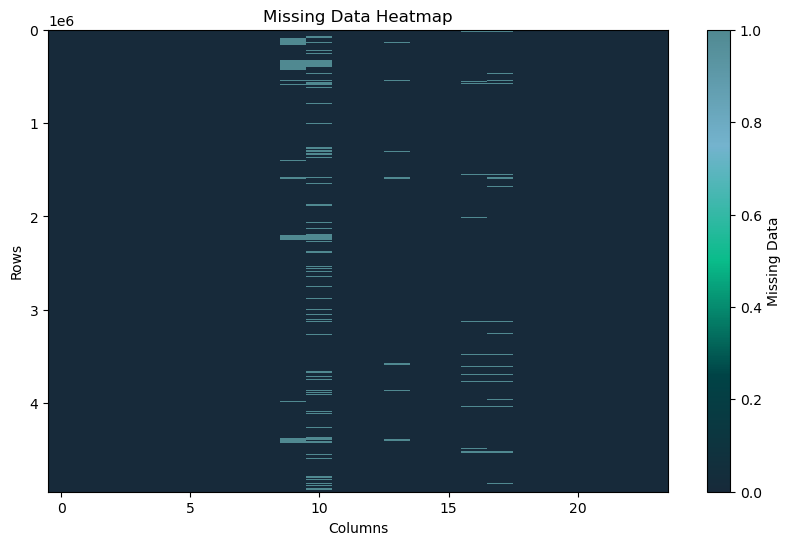

In [70]:
# Visualise the missing data heatmap
plt.figure(figsize=(10, 6))
plt.title("Missing Data Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.imshow(df.isna(), cmap=cmap, aspect='auto', interpolation='none')
plt.colorbar(label='Missing Data')
plt.show()

Observation:
* There is still a large amount of missing data in the form of null values.
* I will handle these remaing null vlaues when we do feature engineering and model building
* I will keep the remaing nulls in for EDA as they help demonstrate the story.

In [72]:
# Check the datatypes
df.dtypes

derived_ethnicity                  object
derived_race                       object
derived_sex                        object
outcome                             int64
preapproval                         int64
loan_type                           int64
reverse_mortgage                    int64
business_or_commercial_purpose      int64
loan_amount                       float64
loan_to_value_ratio                object
interest_rate                      object
loan_term                          object
interest_only_payment               int64
property_value                     object
occupancy_type                      int64
total_units                        object
income                            float64
debt_to_income_ratio               object
applicant_credit_score_type         int64
co-applicant_credit_score_type      int64
applicant_age                      object
co-applicant_age                   object
submission_of_application           int64
denial_reason-1                   

We will need to alter the datatype of several variable to make them useful 

In [74]:
# Describe the dataframe
df.describe(include='all')

,derived_ethnicity,derived_race,derived_sex,outcome,preapproval,loan_type,reverse_mortgage,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,interest_rate,loan_term,interest_only_payment,property_value,occupancy_type,total_units,income,debt_to_income_ratio,applicant_credit_score_type,co-applicant_credit_score_type,applicant_age,co-applicant_age,submission_of_application,denial_reason-1
count,4948833,4948833,4948833,4.948833e+06,4.948833e+06,4.948833e+06,4.948833e+06,4.948833e+06,4.948833e+06,4577710,4236535,4930503.0,4.948833e+06,4864947.0,4.948833e+06,4948833,4.769569e+06,4742594,4.948833e+06,4.948833e+06,4948833,4948833,4.948833e+06,4.948833e+06
unique,5,9,4,NaN,NaN,NaN,NaN,NaN,NaN,175423,11206,958.0,NaN,5461.0,NaN,13,NaN,19,NaN,NaN,8,11,NaN,NaN
top,Not Hispanic or Latino,White,Joint,NaN,NaN,NaN,NaN,NaN,NaN,80.0,5.25,360.0,NaN,255000.0,NaN,1,NaN,30%-<36%,NaN,NaN,25-34,9999,NaN,NaN
freq,3446545,3139209,1789836,NaN,NaN,NaN,NaN,NaN,NaN,374948,82909,2210375.0,NaN,54793.0,NaN,2739725,NaN,740577,NaN,NaN,1471814,2775266,NaN,NaN
mean,NaN,NaN,NaN,8.579552e-01,1.948397e+00,1.347157e+00,1.999556e+00,1.937889e+00,3.804465e+05,NaN,NaN,NaN,1.954396e+00,NaN,1.201248e+00,NaN,1.772517e+02,NaN,3.075688e+00,8.184115e+00,NaN,NaN,1.176439e+00,9.075307e+00
std,NaN,NaN,NaN,3.490961e-01,2.212243e-01,6.849403e-01,2.106528e-02,2.413563e-01,1.667789e+06,NaN,NaN,NaN,2.086249e-01,NaN,5.722587e-01,NaN,4.777551e+04,NaN,2.596533e+00,3.096054e+00,NaN,NaN,3.811936e-01,2.457159e+00
min,NaN,NaN,NaN,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+03,NaN,NaN,NaN,1.000000e+00,NaN,1.000000e+00,NaN,-1.330000e+05,NaN,1.000000e+00,1.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00
25%,NaN,NaN,NaN,1.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.750000e+05,NaN,NaN,NaN,2.000000e+00,NaN,1.000000e+00,NaN,6.400000e+01,NaN,1.000000e+00,9.000000e+00,NaN,NaN,1.000000e+00,1.000000e+01
50%,NaN,NaN,NaN,1.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.850000e+05,NaN,NaN,NaN,2.000000e+00,NaN,1.000000e+00,NaN,9.700000e+01,NaN,2.000000e+00,1.000000e+01,NaN,NaN,1.000000e+00,1.000000e+01
75%,NaN,NaN,NaN,1.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.250000e+05,NaN,NaN,NaN,2.000000e+00,NaN,1.000000e+00,NaN,1.540000e+02,NaN,3.000000e+00,1.000000e+01,NaN,NaN,1.000000e+00,1.000000e+01


Observations:
* The following variableds need to convert to numerical data types:
    * loan_to_value_ratio
    * interest_rate
    * loan_term
    * property_value
    * total_units
    * debt_to_income_ratio
    * applicant_age
    * co_applicat age

In [76]:
df['loan_to_value_ratio'].isnull().sum()

371123

In [77]:
df['loan_to_value_ratio'] = pd.to_numeric(df['loan_to_value_ratio'], errors='coerce')

In [78]:
df['loan_to_value_ratio'].isnull().sum()

371123

In [79]:
df['interest_rate'].value_counts()

interest_rate
5.25       82909
5.625      82796
4.75       82524
5.25       82515
5.5        81817
           ...  
3.90142        1
2.265          1
1.83           1
3.501          1
7.313          1
Name: count, Length: 11206, dtype: int64

In [80]:
df['interest_rate'].isnull().sum()

712298

In [81]:
# Interest rate should be numerical
df['interest_rate'] = pd.to_numeric(df['interest_rate'], errors='coerce')

In [82]:
df['interest_rate'].isnull().sum()

712298

In [83]:
df['loan_term'].isnull().sum()

18330

In [84]:
# Loan term should be numerical
df['loan_term'] = pd.to_numeric(df['loan_term'], errors='coerce')

In [85]:
df['loan_term'].isnull().sum()

18330

In [86]:
df['property_value'].isnull().sum()

83886

In [87]:
# Property value should be numerical 
df['property_value'] = pd.to_numeric(df['property_value'], errors='coerce')

In [88]:
df['property_value'].isnull().sum()

83886

In [89]:
df['total_units'].value_counts()

total_units
1          2739725
1          2052830
2            63096
2            31826
5-24         15462
3            14733
4            11293
3             6883
4             4449
25-49         2892
>149          2384
50-99         2213
100-149       1047
Name: count, dtype: int64

In [90]:
# total units
df['total_units'] = pd.to_numeric(df['total_units'], errors='coerce')

In [91]:
df['total_units'].value_counts()

total_units
1.0    4792555
2.0      94922
3.0      21616
4.0      15742
Name: count, dtype: int64

In [92]:
df['debt_to_income_ratio'].value_counts()

debt_to_income_ratio
30%-<36%    740577
20%-<30%    717586
50%-60%     427493
<20%        257113
49          204195
44          202910
42          197891
>60%        193334
43          182563
41          182267
40          178017
39          171113
45          162712
38          161299
48          161181
37          154633
47          151771
46          150182
36          145757
Name: count, dtype: int64

In [93]:
# Re-map the categories of 'debt_to_income' and change the data type from object to category
category_mapping = {
    '<20%': '<20%',
    '20%-<30%': '20%-<30%',
    '30%-<36%': '30%-<40%',
    '36': '30%-<40%',
    '37': '30%-<40%',
    '38': '30%-<40%',
    '39': '30%-<40%',
    '40': '30%-<40%',
    '41': '40%-<50%',
    '42': '40%-<50%',
    '43': '40%-<50%',
    '44': '40%-<50%',
    '45': '40%-<50%',
    '46': '40%-<50%',
    '47': '40%-<50%',
    '48': '40%-<50%',
    '49': '40%-<50%',
    '50%-60%': '50%-<60%',
    '>60%': '>60%'
}

# Map the original categories to the new categories
df['debt_to_income_ratio'] = df['debt_to_income_ratio'].map(category_mapping)

In [94]:
df['debt_to_income_ratio'].value_counts()

debt_to_income_ratio
40%-<50%    1595672
30%-<40%    1551396
20%-<30%     717586
50%-<60%     427493
<20%         257113
>60%         193334
Name: count, dtype: int64

In [95]:
df['debt_to_income_ratio'].astype('category')

0          50%-<60%
1          40%-<50%
2          30%-<40%
3              <20%
4              <20%
             ...   
5075868         NaN
5075869    50%-<60%
5075870         NaN
5075871        >60%
5075872    40%-<50%
Name: debt_to_income_ratio, Length: 4948833, dtype: category
Categories (6, object): ['20%-<30%', '30%-<40%', '40%-<50%', '50%-<60%', '<20%', '>60%']

In [96]:
df['applicant_age'].value_counts()

applicant_age
25-34    1471814
35-44    1314449
45-54     853073
55-64     571574
<25       286130
65-74     269324
8888      109468
>74        73001
Name: count, dtype: int64

In [97]:
# Dropping rows where applicant_Age is 8888
df = df[df['applicant_age'] != '8888']

In [98]:
df['applicant_age'].value_counts()

applicant_age
25-34    1471814
35-44    1314449
45-54     853073
55-64     571574
<25       286130
65-74     269324
>74        73001
Name: count, dtype: int64

In [99]:
df['applicant_age'].astype('category')

0          55-64
1          55-64
2          45-54
3          55-64
4          45-54
           ...  
5075868    55-64
5075869    55-64
5075870      <25
5075871    45-54
5075872    25-34
Name: applicant_age, Length: 4839365, dtype: category
Categories (7, object): ['25-34', '35-44', '45-54', '55-64', '65-74', '<25', '>74']

In [100]:
# co applicant age
df['co-applicant_age'].value_counts()

co-applicant_age
9999     2696182
25-34     644407
35-44     535878
45-54     351273
55-64     279072
65-74     153168
<25       119097
>74        41448
8888       18651
9999         189
Name: count, dtype: int64

In [101]:

# Define a function to map values
def map_values(value):
    if value in ['8888', '9999', 8888, 9999]:
        return 1
    else:
        return 0

# Apply the mapping function to the column
df['co-applicant_age'] = df['co-applicant_age'].apply(map_values)


In [102]:
# co applicant age
df['co-applicant_age'].value_counts()

co-applicant_age
1    2715022
0    2124343
Name: count, dtype: int64

In [103]:
# Rename the columns for better interpetability
df.rename(columns={'co-applicant_age': 'co_applicant',
                   'derived_ethnicity' : 'ethnicity',
                   'derived_race' : 'race',
                   'derived_sex' : 'sex',
                   'submission_of_application' : 'intermediary',
                   'denial_reason-1' : 'denial_reason',
                   'applicant_age' : 'age'
                    }, inplace=True)

# This column now acts as a proxy for wether or not there was a co-applicant

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4839365 entries, 0 to 5075872
Data columns (total 24 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   ethnicity                       object 
 1   race                            object 
 2   sex                             object 
 3   outcome                         int64  
 4   preapproval                     int64  
 5   loan_type                       int64  
 6   reverse_mortgage                int64  
 7   business_or_commercial_purpose  int64  
 8   loan_amount                     float64
 9   loan_to_value_ratio             float64
 10  interest_rate                   float64
 11  loan_term                       float64
 12  interest_only_payment           int64  
 13  property_value                  float64
 14  occupancy_type                  int64  
 15  total_units                     float64
 16  income                          float64
 17  debt_to_income_ratio            

In [105]:
# Check the balance of our target class
df['outcome'].value_counts(normalize=True)*100

outcome
1    85.698268
0    14.301732
Name: proportion, dtype: float64

In [106]:
df.to_csv('ML_data.csv', index=False)


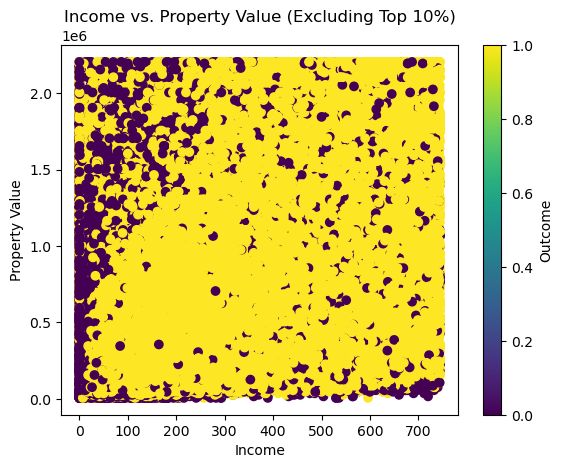

In [107]:
import matplotlib.pyplot as plt

# Filter out negative income values
filtered_df = df[df['income'] >= 0]

# Calculate the 90th percentile of income and property value
income_threshold = filtered_df['income'].quantile(0.99)
property_value_threshold = filtered_df['property_value'].quantile(0.99)

# Filter the DataFrame to exclude the highest 10% of income and property value
filtered_df = filtered_df[(filtered_df['income'] <= income_threshold) & (filtered_df['property_value'] <= property_value_threshold)]

# Create scatter plot using the filtered DataFrame and apply hue for the "outcome" variable
plt.scatter(filtered_df['income'], filtered_df['property_value'], c=filtered_df['outcome'])  # Use the 'outcome' variable as the hue

# Add labels and title
plt.xlabel('Income')
plt.ylabel('Property Value')
plt.title('Income vs. Property Value (Excluding Top 10%)')

# Add a colorbar to show the mapping of outcomes to colors
plt.colorbar(label='Outcome')

# Display the plot
plt.show()

In [108]:
df['income']

0          371.0
1           62.0
2           43.0
3          662.0
4          176.0
           ...  
5075868      NaN
5075869    371.0
5075870      8.0
5075871     31.0
5075872     66.0
Name: income, Length: 4839365, dtype: float64